In [1]:
import os
import csv
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
ansatz_str = 'UCCSD'
path = f'yukawa_noise_model_{ansatz_str}'
optimizer_str = ['COBYLA_128', 'COBYLA_16384']

In [3]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [4]:
def format_number(number):
    # Convertir el número a una cadena con notación científica para extraer la primera cifra significativa
    scientific_str = f"{number:.1e}"
    first_digit = int(scientific_str[0])
    
    # Si la primera cifra significativa es 1, usar dos cifras significativas
    if first_digit == 1:
        formatted_number = f"{number:.2g}"
    else:
        # Si la primera cifra significativa es diferente de 1, usar una cifra significativa
        formatted_number = f"{number:.1g}"
    
    return formatted_number

def match_decimals(number_to_format, reference_number):
    # Formatear el número de referencia para determinar la cantidad de decimales
    formatted_reference = format_number(reference_number)
    
    # Extraer la parte decimal del número formateado
    if '.' in formatted_reference:
        decimals = len(formatted_reference.split('.')[1])
    else:
        decimals = 0
    
    # Formatear el número a formatear con la misma cantidad de decimales
    formatted_number = f"{number_to_format:.{decimals}f}"
    
    return formatted_number

In [5]:
files = [file for file in os.listdir(f'{path}') if file.endswith('.csv')]
for i, file in enumerate(files):
    alpha  = []
    energy = []

    with open(f'{path}/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            alpha.append(float(row[0]))
            energy.append(float(row[1]))

In [6]:
for optimizer in optimizer_str:
    globals()[f'alpha_{optimizer}'] = []
    globals()[f'energy_{optimizer}'] = []

    files = [file for file in os.listdir(f'{path}/results_{optimizer}') if file.endswith('.csv')]

    for index, file in enumerate(files):

        globals()[f'alpha_{optimizer}'].append([])
        globals()[f'energy_{optimizer}'].append([])
        
        with open(f'{path}/results_{optimizer}/{file}', 'r') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                globals()[f'alpha_{optimizer}'][index].append(float(row[0]))
                globals()[f'energy_{optimizer}'][index].append(float(row[1]))

    globals()[f'files_names_{optimizer}'] = [file.split('.')[0] for file in files]

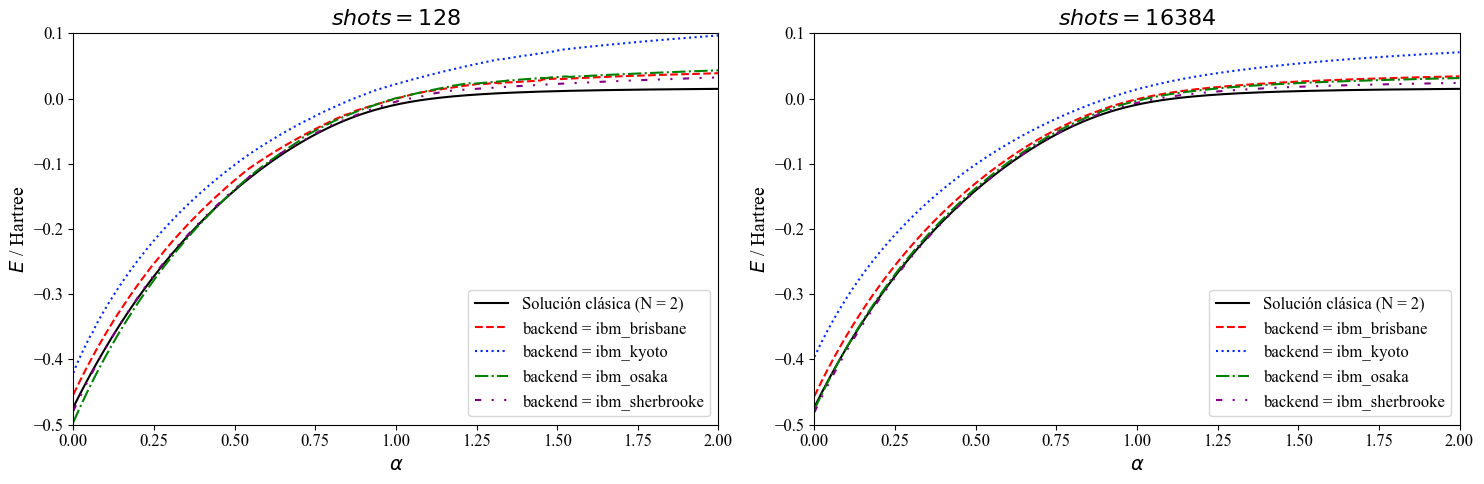

In [7]:
colors = ['red', '#0027FF', 'green', 'purple']
lines = ['--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

for i, optimizer in enumerate(optimizer_str):
    row = 1
    column = i % columns

    for n, file in enumerate(globals()[f'files_names_{optimizer}']):
        if n == 0:
            axs[column].plot(alpha, energy,
                             color='black', marker='', linestyle='-', label='Solución clásica (N = 2)')
        
        axs[column].plot(globals()[f'alpha_{optimizer}'][n], globals()[f'energy_{optimizer}'][n],
                         color=colors[n], marker='', linestyle=lines[n], label=f'{file.split('=')[0]} = {file.split('=')[-1]}')
        axs[column].set_title(f'$shots={optimizer.split('_')[-1]}$', fontsize=16)
        axs[column].set_xlabel(r'$\alpha$', fontsize=14)
        axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].set_xlim(0, 2)
        axs[column].set_ylim(-0.5, 0.1)
        axs[column].legend(loc='lower right')
        

plt.tight_layout()
plt.savefig(f'{path}/yukawa_noise_model_{ansatz_str}_plot.png')
plt.savefig(f'../../../TFG/Figuras/yukawa_noise_model_{ansatz_str}_plot.png')
plt.show()

In [8]:
alpha_c_exact = 1.111

In [9]:
optimizer_str = 'COBYLA_16384'

for n, file in enumerate(globals()[f'files_names_{optimizer}']):

    alpha_c = []

    for i in range(len(globals()[f'energy_{optimizer}'][n])-1):
        if globals()[f'energy_{optimizer}'][n][i] * globals()[f'energy_{optimizer}'][n][i+1] < 0:
            alpha_c.append((globals()[f'alpha_{optimizer}'][n][i] + globals()[f'alpha_{optimizer}'][n][i+1]) / 2)
    
    
    a = file.split('=')[-1]

    if len(alpha_c) == 0:
        print(f'		{a} & & \\\\')
    elif len(alpha_c) == 1:
        b = alpha_c[0]
        c = 0.005
        b = match_decimals(float(b), float(c))
        d = abs(round((float(b) - alpha_c_exact) / alpha_c_exact * 100, 2))
        print(f'		{a} & ${b} \\pm {c}$ & ${d}\\%$ \\\\')
    else:
        b = (alpha_c[0] + alpha_c[-1]) / 2
        c = abs(alpha_c[0] - alpha_c[-1] / 2)
        b = match_decimals(float(b), float(c))
        d = abs(round((float(b) - alpha_c_exact) / alpha_c_exact * 100, 2))
        print(f'		{a} & ${b} \\pm {c}$ & ${d}\\%$ \\\\')

		ibm_brisbane & $1.010 \pm 0.005$ & $9.09\%$ \\
		ibm_kyoto & $0.910 \pm 0.005$ & $18.09\%$ \\
		ibm_osaka & $1.030 \pm 0.005$ & $7.29\%$ \\
		ibm_sherbrooke & $1.060 \pm 0.005$ & $4.59\%$ \\
